# Neural network

This notebook showcases the use of a simple neural network, as implemented in the neuralnet.py module. We test it on two simple artifical data sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import tensor

In [2]:
from neuralnet import NNLearner

## Test 1 - learning the Heaviside function

Creating the dataset and visualising.

In [3]:
x  = [np.random.uniform(-2,2) for i in range(100)]
df = pd.DataFrame(zip(x,map(lambda x : float(x>0), x)))
df.columns = ['x','y']
df.head()

,x,y
0,-1.747890,0.0
1,-0.653672,0.0
2,-0.951677,0.0
3,-0.541070,0.0
4,-0.739078,0.0


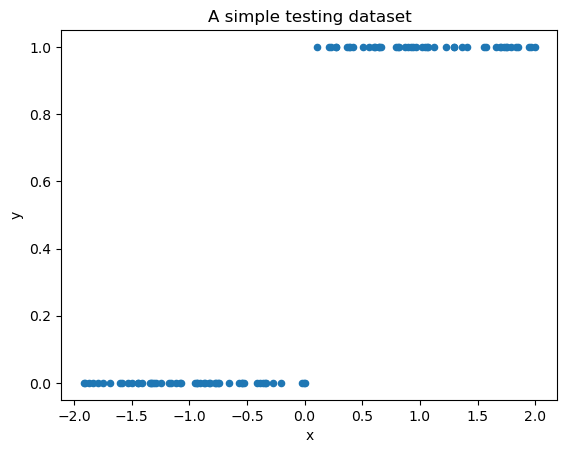

In [4]:
df.plot(x='x',y='y',kind='scatter',title='A simple testing dataset')
plt.show()

Here we use a simple logistic regression (i.e. a neural network with 0 hidden layers). The input to the learner is the dataframe, the name of the dependent column (in this case 'y'), as well as the desired learning rate, number of iterations and network geometry.

In [5]:
learn = NNLearner(df,'y', learningRate = 0.5, numIterations = 30, geometry = [])

100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 456.05it/s]


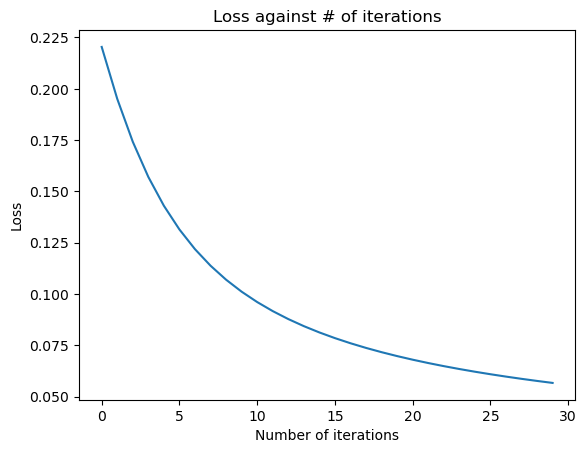

Training accuracy: 99%.


In [6]:
learn.learn()
learn.plotLosses()
print(f'Training accuracy: {learn.trainingAccuracy()*100:.0f}%.')

We can make predictions on new input like so:

In [7]:
learn.predictDf(df['x'])[0:10]

tensor([[0.0647],
        [0.2697],
        [0.1897],
        [0.3050],
        [0.2448],
        [0.3976],
        [0.1139],
        [0.7193],
        [0.1933],
        [0.8801]], dtype=torch.float64, grad_fn=<SliceBackward0>)

## Test 2 - a circular dataset

We create the dataset by using polar coordinates and the following helper function:

In [8]:
def random2Dpoint(scale):
    """
    Returns a random point in an annulus of radius ~scale.
    """
    theta = np.random.uniform(0,2*np.pi)
    r = np.random.rand() + scale
    return r*np.cos(theta),r*np.sin(theta)

In [9]:
numP = 100
points = [(*random2Dpoint(0),0.) for i in range(numP)] + [(*random2Dpoint(1),1.) for i in range(numP)]
df = pd.DataFrame(points)
df.columns = ['x1','x2','y']
df.head()

,x1,x2,y
0,0.408614,-0.537013,0.0
1,-0.682483,-0.261763,0.0
2,-0.093543,0.467109,0.0
3,0.795608,-0.093192,0.0
4,0.269054,0.094337,0.0


We plot the dataset to reveal its simple structure. Points are colored according to their y-value.

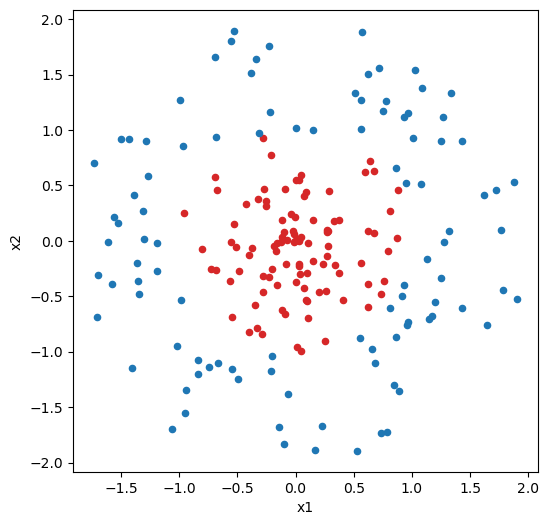

In [10]:
colors = {0. : 'tab:red', 1. : 'tab:blue'}
fig, ax = plt.subplots(figsize=(6, 6))

grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, x='x1', y='x2', kind='scatter', color=colors[key])
plt.show()

Here we use a neural network with 10 hidden layers - logistic regression (with an affine linear activation) cannot fit the required circular decision boundary.

In [11]:
learn = NNLearner(df,'y', learningRate = 3, numIterations = 800, geometry = [10])

100%|███████████████████████████████████████| 800/800 [00:00<00:00, 2534.35it/s]


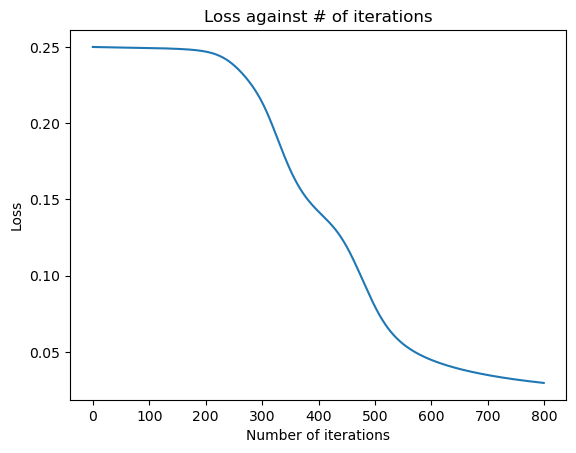

Training accuracy: 98%.


In [12]:
learn.learn()
learn.plotLosses()
print(f'Training accuracy: {learn.trainingAccuracy()*100:.0f}%.')

Note that this notebook does not make use of a split of data into a training/validation set to prevent or control overfitting - it merely serves the purpose of demonstrating the functioning of the neural network module.